<a href="https://colab.research.google.com/github/UsmanAwaan786/A-Deep-Learning-Approach-for-Multi-Label-Chest-X-ray-Diagnosis-Using-DenseNet-121/blob/V1.0/EDA_of_NIH_Chest_X_ray_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#! kaggle datasets download zeyadkhalid/faceshape-processed


# **Downloading dataset**

In [ ]:
! kaggle datasets download -d khanfashee/nih-chest-x-ray-14-224x224-resized

In [ ]:
! unzip nih-chest-x-ray-14-224x224-resized.zip

## **Importing required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
import os
import seaborn as sns



#**Loading Dataset**

In [ ]:
# Load the CSV file containing patient information
patient_data = pd.read_csv('Data_Entry_2017.csv')

print(patient_data.head(),"\n"*2)

# Get a summary of the patient demographics
print("Summary")
patient_demographics_summary = patient_data.describe()
print(patient_demographics_summary)

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

  Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0        058Y              M            PA                 2682     2749   
1        058Y              M            PA                 2894     2729   
2        058Y              M            PA                 2500     2048   
3        081Y              M            PA                 2500     2048   
4        081Y              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1   

In [ ]:
# Step 1: Load the CSV file with labels
csv_file_path = 'Data_Entry_2017.csv'
df = pd.read_csv(csv_file_path)

# Assuming your CSV file has columns like 'Image Index' and 'Finding Labels'
image_paths = df['Image Index'].tolist()
labels = df['Finding Labels'].tolist()

# Step 2: Load and print details for the first image
image_folder = 'images-224/images-224'

# Take the first image
image_path = image_paths[5]
label = labels[5]

# Construct the full path to the image
full_path = os.path.join(image_folder, image_path)

# Open and load the image
image = Image.open(full_path)
#how can i show the image?
# Print image details
print(f"Image Path: {full_path}")
print(f"Label: {label}")


Image Path: images-224/images-224/00000003_001.png
Label: Hernia


# **Total Number of classes**

In [ ]:
# Counting total number of unique classes
unique_classes = set()
for labels in df['Finding Labels'].str.split('|'):
    unique_classes.update(labels)

total_classes = len(unique_classes)
print(f'Total Number of Unique Classes: {total_classes}')


Total Number of Unique Classes: 15


# **List of unique classes**

In [ ]:
# Listing down unique classes
unique_classes = set()
for labels in df['Finding Labels'].str.split('|'):
    unique_classes.update(labels)

unique_classes_list = list(unique_classes)
print(f'Unique Classes List:')
for cls in unique_classes_list:
    print(cls)

Unique Classes List:
Pneumothorax
No Finding
Atelectasis
Effusion
Cardiomegaly
Infiltration
Emphysema
Mass
Nodule
Pleural_Thickening
Pneumonia
Hernia
Fibrosis
Consolidation
Edema


# **Total Number of X-ray Images**

In [ ]:
# Total Number of Images
total_images = len(df)
print(f'Total Number of Images: {total_images}')


Total Number of Images: 112120


# **Sample of Images with their corresponding labels from Dataset**

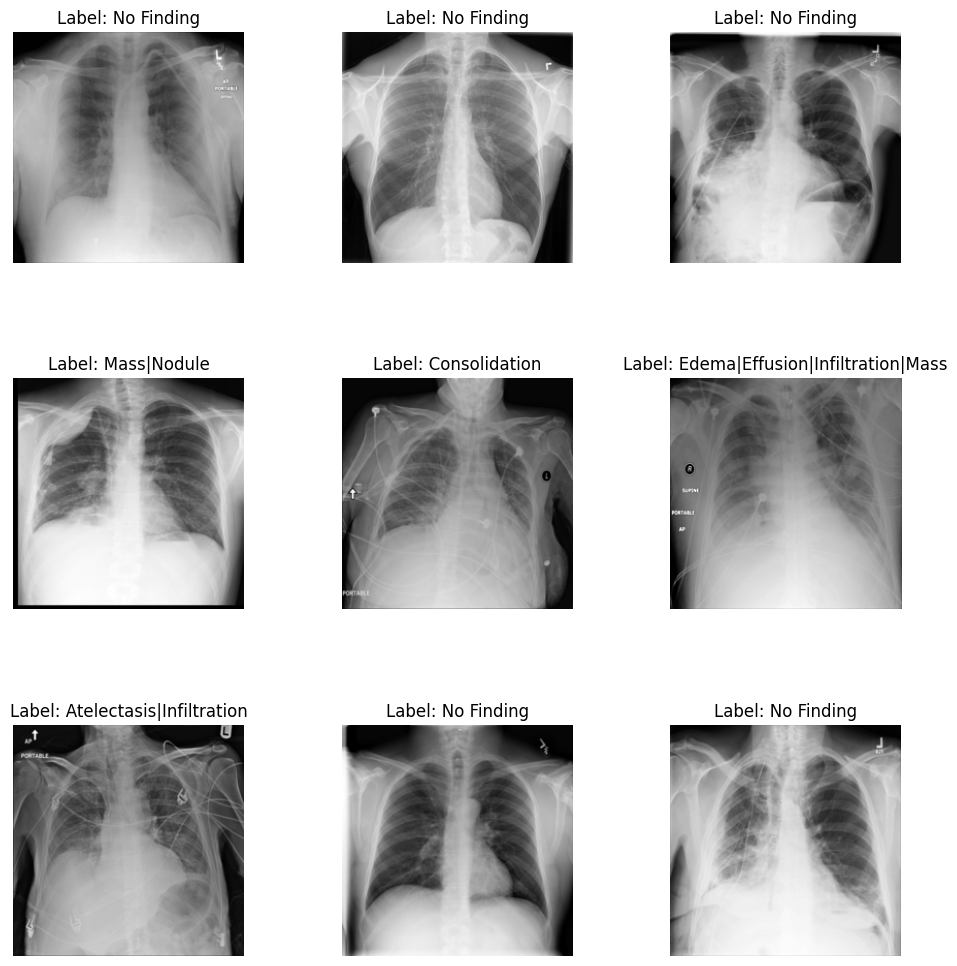

In [ ]:
# Function to display random images with labels in a 3x3 grid
def display_random_images(dataframe, image_folder, num_images=9):
    # Get random indices
    random_indices = random.sample(range(len(dataframe)), num_images)

    # Create a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5)

    for i, ax in enumerate(axes.flat):
        # Get random index
        idx = random_indices[i]

        # Get image path and label
        image_path = os.path.join(image_folder, dataframe['Image Index'].iloc[idx])
        label = dataframe['Finding Labels'].iloc[idx]

        # Load and display the image
        img = mpimg.imread(image_path)
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f"Label: {label}")

    plt.show()

# Call the function to display random images
display_random_images(df, 'images-224/images-224', num_images=9)


# **Distribution of X Ray images across Patient gender**


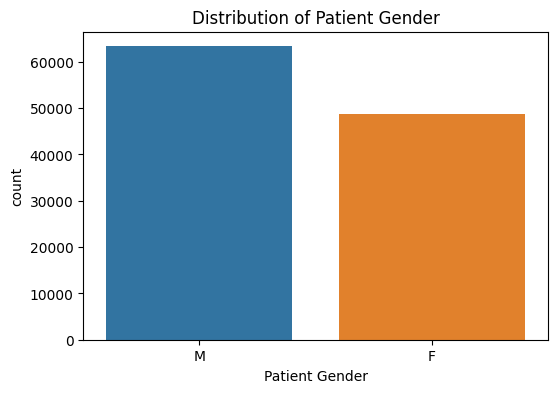

In [ ]:
# Distribution of 'Patient Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Patient Gender', data=df)
plt.title('Distribution of Patient Gender')
plt.show()

## **Each desease distribution across the patient genders**

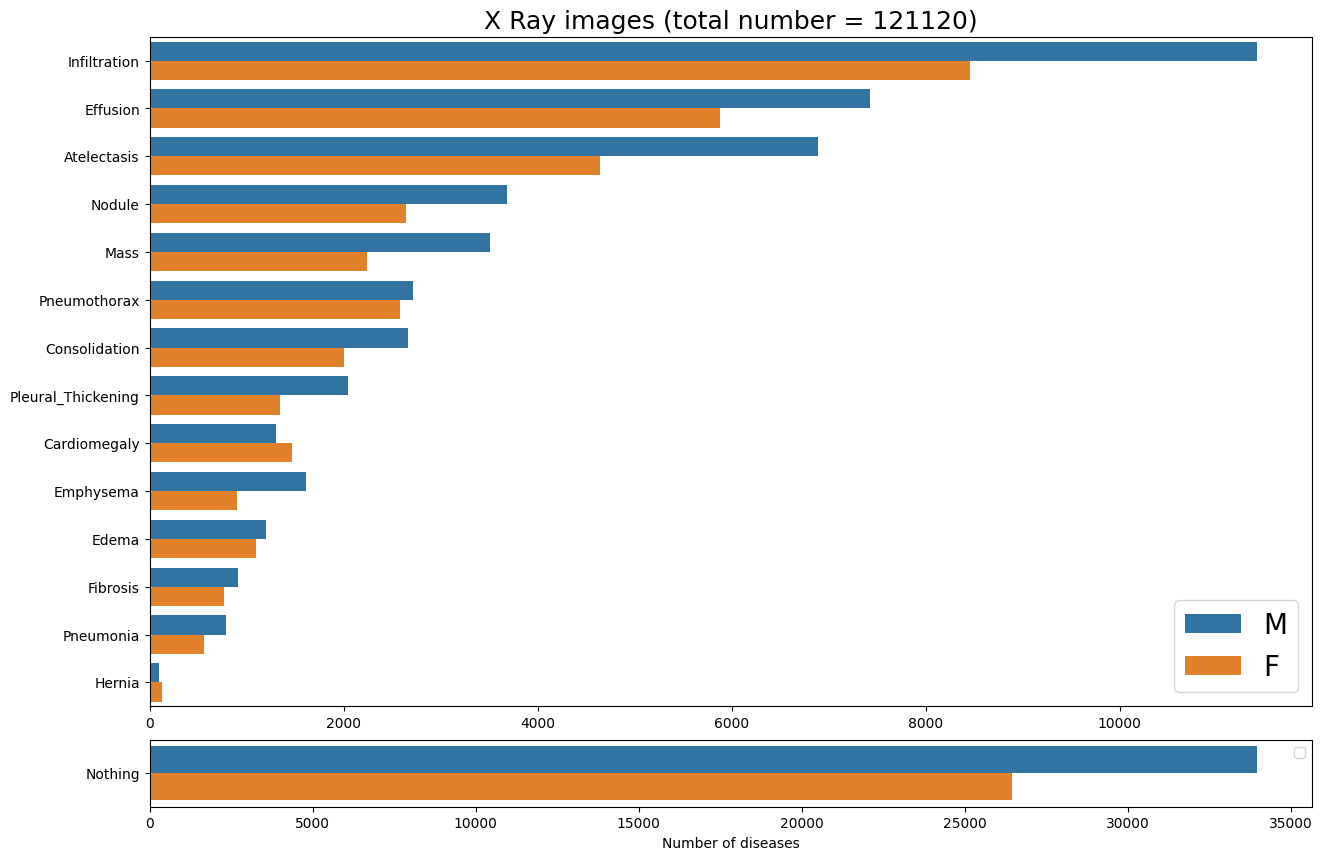

In [ ]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray images (total number = 121120)',fontsize=18);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of diseases")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

# **Comparison of simple and multiple deseases**

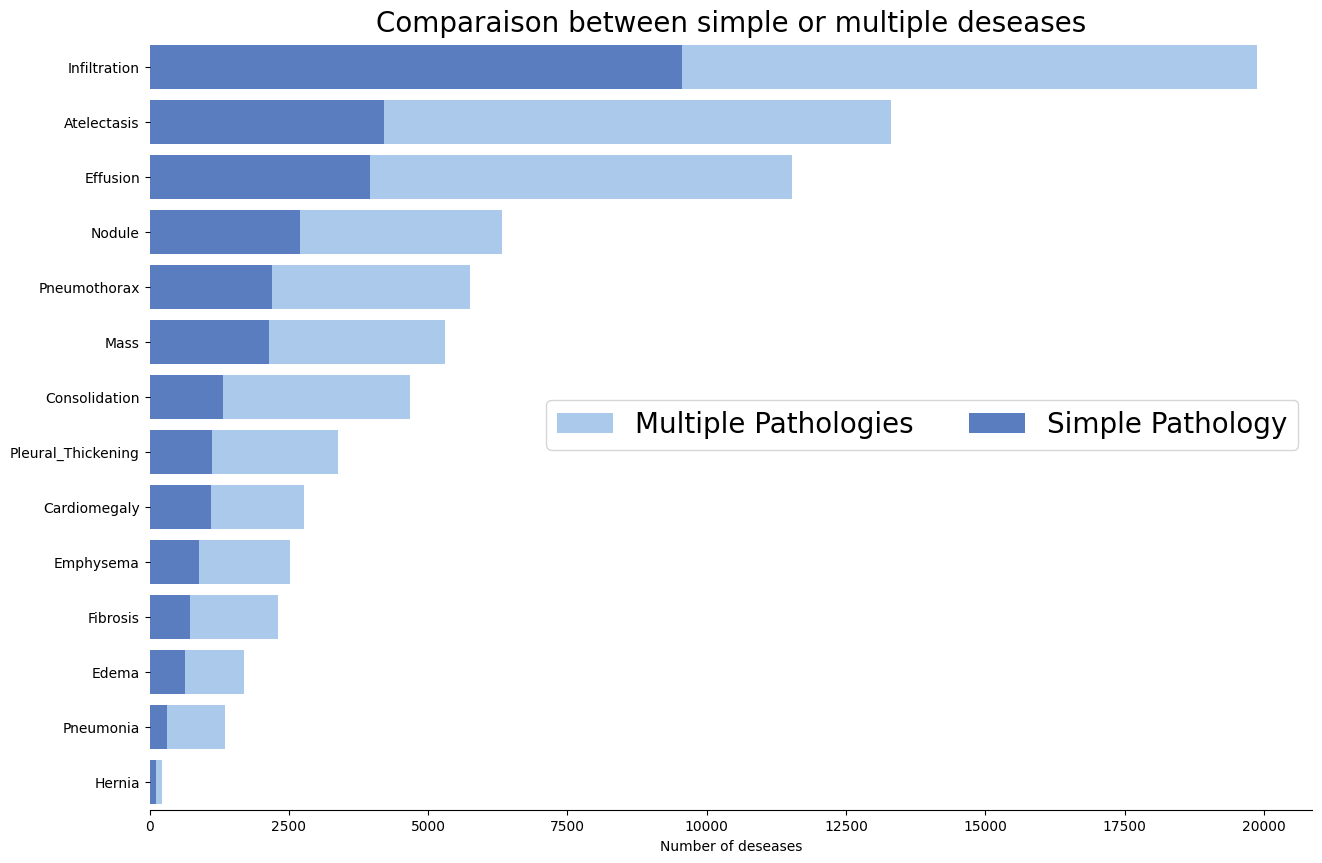

In [ ]:
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of deseases")
ax.set_title("Comparaison between simple or multiple deseases",fontsize=20)
sns.despine(left=True)